# ***QUIZ 2***
**AZIZI BIN MOHAMAD TAMBI (1919661)**

Assume that you are working in a company that produces bricks for edutainment. As a machine vision 
engineer, you are required to build an algorithm which is able to automatically calculate the number of 
objects in each batch prior delivering them to packaging house. 

Specifically, your task is to perform morphological image processing operations so that you get the 
correct count of the number of objects present in the image lego1.png (refer Figure 1).

1) Write a Python script that reads the image 'lego1.png', binarizes it, and then performs the necessary 
morphological operations to print out the correct number of objects in this image. (10 marks)

2) Write a comment at each important code line to describe the operation. (5 marks)

3) Briefly describe how the algorithm works and make a flowchart to visualize such procedure. (5 
marks)

# **QUESTION 1 & 2 BEGIN**

In [170]:
#Importing libary to be used
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [171]:
#mount google drive to colab environment
from google.colab import drive
drive.mount('/content/gdrive')

#path to lego1.png
path = "/content/gdrive/MyDrive/MV quiz/"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


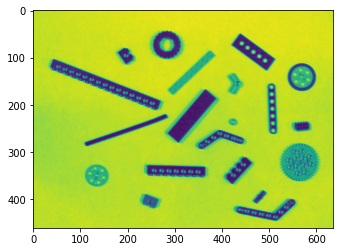

In [172]:
#Open image using openCV2 in grayscale
lego = cv2.imread(path + "lego1.png") #read the image
lego_gray = cv2.cvtColor(lego, cv2.COLOR_BGR2GRAY) #convert to grayscale

#display the image
#plt.imshow(lego)
plt.imshow(lego_gray)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

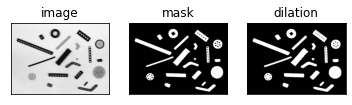

In [173]:
#creating a mask/ binarize the image from range 150-255
_, mask = cv2.threshold(lego_gray, 150,255, cv2.THRESH_BINARY_INV)

kernel =  np.ones((2,2), np.uint8) #a 2x2 square shape that will be applied to our image
dilation = cv2.dilate(mask, kernel) #reduce the black dots on the white image so we can differentiate each lego

#show the masked image
titles = ['image', 'mask', 'dilation']
lego_mask = [lego_gray, mask, dilation]

for i in range(3): #number of images
  plt.subplot(1, 3, i+1), plt.imshow(lego_mask[i], 'gray')
  plt.title(titles[i])
  plt.xticks([]), plt.yticks([])

plt.show

In [174]:
#Increase the kernel size from 2x2 to 5x5 (bigger kernel remove the black dot however the size of white area will increased)
kernel_new = np.ones((5,5), np.uint8)

#Add iteration to dilation so that it can removes the black dot inside the white lego image
dilation_new = cv2.dilate(mask, kernel, iterations = 2)

#Apply erosion to the image
erosion = cv2.erode(mask, kernel, iterations = 1) #default iteration is 1

#Apply opening morphological to the image
open_morph = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

#Apply morphological gradient to the image
grad_morph = cv2.morphologyEx(mask, cv2.MORPH_GRADIENT, kernel, iterations = 1)

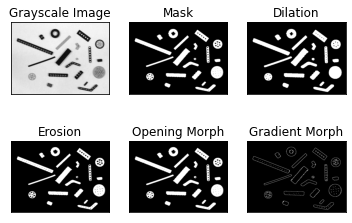

In [175]:
#Plot the image
Titles = ['Grayscale Image', 'Mask', 'Dilation', 'Erosion', 'Opening Morph', 'Gradient Morph']
Overall_img = [lego_gray, mask, dilation_new, erosion, open_morph, grad_morph]

for i in range(6): #number of images
  #plt.figure(figsize=[20,20])
  plt.subplot(2, 3, i+1), plt.imshow(Overall_img[i], 'gray')
  plt.title(Titles[i])
  plt.xticks([]), plt.yticks([])

plt.show()

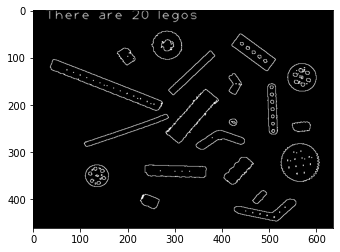

In [176]:
#Find contours of the image from grad_morph 
(cnt, _) = cv2.findContours(grad_morph.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#create text for the image
text = "There are {} legos".format(len(cnt))
font = cv2.FONT_HERSHEY_PLAIN
cv2.putText(grad_morph, text, (25,20), font, 2, (255 ,0 ,0), 1, cv2.LINE_AA)

plt.imshow(grad_morph, cmap = 'gray')


## **QUESTION 3: FLOWCHART**

*Explanation:*

Firstly, import the required library and import the picture from local drive or from google drive. Since the picture is in BGR mode, we will need to convert it to grayscale first or simply just import the picture in grayscale format.

After importing the picture, we will need to create a "Mask" so that we can binarize the image. We set the threshold to be from 150 to 255 as 255 is the maximum value. The reason of doing so is because we want to change the image to become black and white based on the threshold made, hence, since we want to binarize it, the value of the picture will become 0 or 1. We use cv2.threshold to binarize the image.

Next, we need to create a kernel with a size of 5x5 for the image. The size of the kernel depend with how much we want to convolve the image and the kernel. For this project, higher value of kernel allows the blackdot inside the white region (lego's region) to be removed however, the white region will increase.

Then, we apply morphological operation to the image using cv2.morphologyEx. For this project specifically, we apply gradient morphology to produce gradient in the image. 

Lastly, to find the number of the lego's from the picture, we can find the contours produced by using cv2.findContours and add a text to indicate the number of legos inside the picture. 

Figure below shows the flowchart of the program

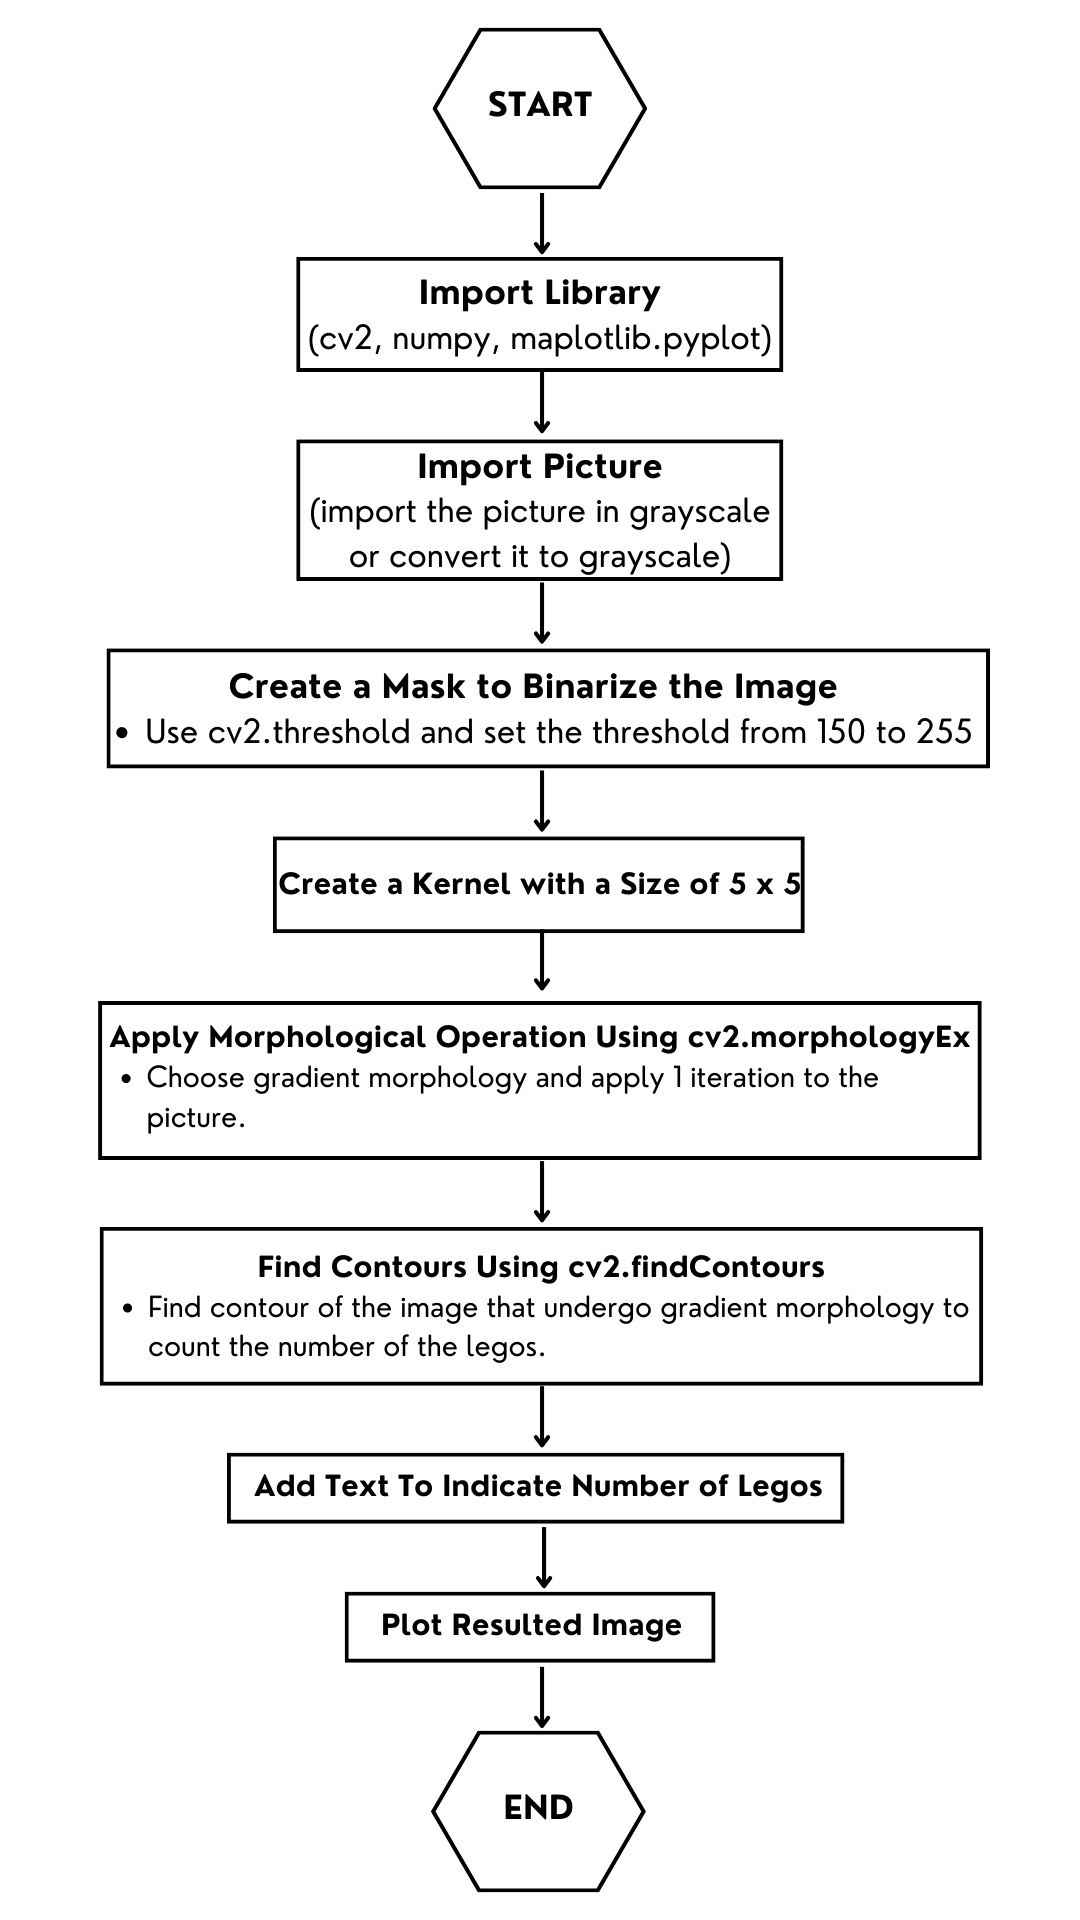